In [1]:
from scipy.stats import randint, bernoulli, geom, binom, poisson, uniform, expon, norm 
import numpy as np
from math import exp, sqrt
import matplotlib.pyplot as plt
import pandas as pd
import itertools
!pip install icecream
from icecream import ic

Defaulting to user installation because normal site-packages is not writeable


Vítajte pri 8. cvičení. Cieľom tohoto cvičenie je ukázať vám intro do dátovej analázy v pythone, teda zistenie základných charakteristík dátových súborov. Nazačiatok si prosím vložte do colabu súbory s ktorými budeme pracovať. Nájdete ich v učebných materiáloch na adrese https://is.muni.cz/auth/el/fi/jaro2023/MB153/um/54978340/dataMV011cv.zip. V colabe ich nahráte tak, že naľavo na lište kliknete na ikonku súboru, potom na najpravejšie tlačítko so šípočkou hore a nakoniec vyberiete súbor s ktorým chcete robiť. Teraz bude nasledovať časť kde si na príklade 1. ukážeme ako dáta načítať, vytvoriť tabuľku četností a zistiť o nich základné údajte.

In [2]:
data = pd.read_csv(r"znamky.csv") # pre zistenie adresy kliknite prvym na subor a dajte copy path
data.head() # príkaz, ktorý vám ukáže prvých pár riadkov vašeho datasetu

,znamka,cetnosti
0,1,7
1,2,3
2,3,2
3,4,8


In [3]:

entries = len(data) # pocet riadkov vasej tabulky
n = sum(data["cetnosti"]) # pocet pozorovani
# podme postupne konstruovat tabulku cetnosti
data["relativni cetnosti"] = data["cetnosti"] / n
data["kumulativni cetnosti"] = data["cetnosti"].cumsum()
data["ECDF"] = data["kumulativni cetnosti"] / n # relativne kumulativne cetnosti
# kedže máme tabuľku kde máme četnosti dát, tak si vytvoríme vektor dát nad ktorým sa bude krajšie pracovať
X = list(itertools.chain.from_iterable([list(itertools.repeat(to_repeat, times)) for (to_repeat, times) in zip(data['znamka'], data['cetnosti'])]))
ic(X) # vpodstate sme si nakopirovali cetnost(times) krát znamky (to repeat) 
priemer =  np.mean(X) #priemer 
rozptyl = np.var(X)
vyberovy_rozptyl = rozptyl * n / (n-1)
smerodatna_odch = np.std(X)
median = np.quantile(X, 0.5, method = 'inverted_cdf')
q_025 = np.quantile(X, 0.25, method = 'inverted_cdf')
q_075 = np.quantile(X, 0.75, method = 'inverted_cdf')
IQR = q_075 - q_025 # kvartilova odchylka
# nakoniec hradby boxplotu
dvnh = q_025 - 1.5 * IQR # dolni vnitrni hradba
hvnh = q_075 + 1.5 * IQR# horni vnitrni hradba
dvoh = q_025 - 3 * IQR# dolni vonkajsi hradba
hvoh = q_075 + 3 * IQR# horni vonkajsi hradba
ic(entries, n, priemer, rozptyl, vyberovy_rozptyl, smerodatna_odch, median, q_025, q_075, IQR, dvnh, hvnh, dvoh, hvoh)
data # tabulka cetnosti

ic| X: [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4]
ic| entries: 4
    n: 20
    priemer: 2.55
    rozptyl: 1.7474999999999998
    vyberovy_rozptyl: 1.8394736842105261
    smerodatna_odch: 1.3219304066402284
    median: 2
    q_025: 1
    q_075: 4
    IQR: 3
    dvnh: -3.5
    hvnh: 8.5
    dvoh: -8
    hvoh: 13


,znamka,cetnosti,relativni cetnosti,kumulativni cetnosti,ECDF
0,1,7,0.35,7,0.35
1,2,3,0.15,10,0.50
2,3,2,0.10,12,0.60
3,4,8,0.40,20,1.00


Ďalej si ukážeme ako spraviť grafy, o ktorých ste si na prednáške hovorili.

Text(0.5, 1.0, 'Stlpcovy graf')

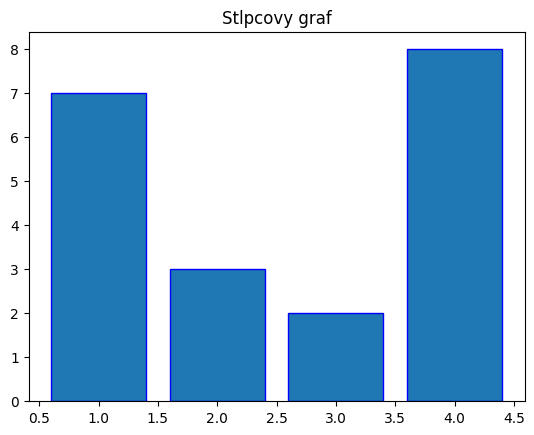

In [4]:
# Stlpcovy graf
plt.bar(data["znamka"], data["cetnosti"], label='Stlpcový graf', ec = "blue")
plt.title("Stlpcovy graf")



Text(0.5, 1.0, 'Cetnostni graf')

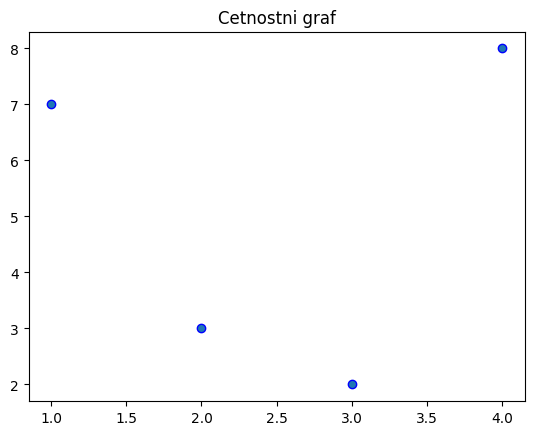

In [5]:
# Cetnostni graf
plt.scatter(data["znamka"], data["cetnosti"], label='Cetnostni graf', ec = "blue")
plt.title("Cetnostni graf")


Text(0.5, 1.0, 'Polygon cetnosti')

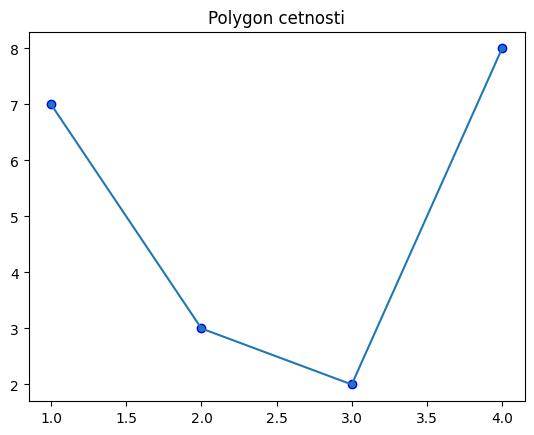

In [6]:
# Polygon cetnosti
plt.scatter(data["znamka"], data["cetnosti"], label='Polygon cetnosti', ec = "blue")
plt.plot(data["znamka"], data["cetnosti"], label='Polygon cetnosti')
plt.title("Polygon cetnosti")


Text(0.5, 1.0, 'ECDF')

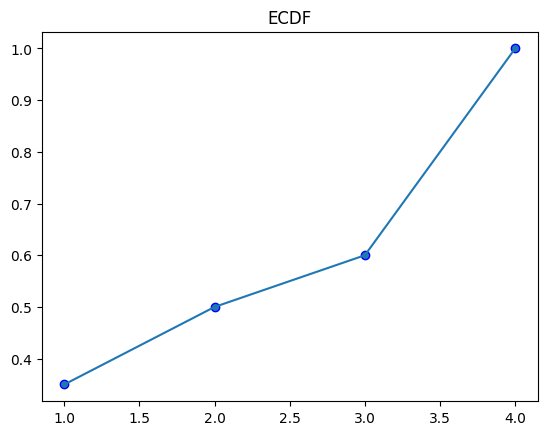

In [7]:
# Empiricka distribucni funkce
plt.figure(3) # aby sme povedali, ze robime novy obrazok
plt.scatter(data["znamka"], data["ECDF"], label='ECDF', ec = "blue")
plt.plot(data["znamka"], data["ECDF"], label='ECDF')
plt.title("ECDF")


Text(0.5, 1.0, 'Histogram')

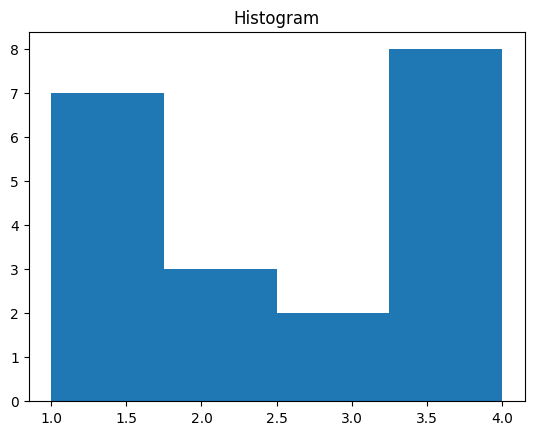

In [8]:
# Histogram
# Pri praci s histogramom sa vraciame k nasemu vygenerovanemu vektoru X
plt.hist(X, label='Histogram', bins = 4)
plt.title("Histogram")

Text(0.5, 1.0, 'Boxplot')

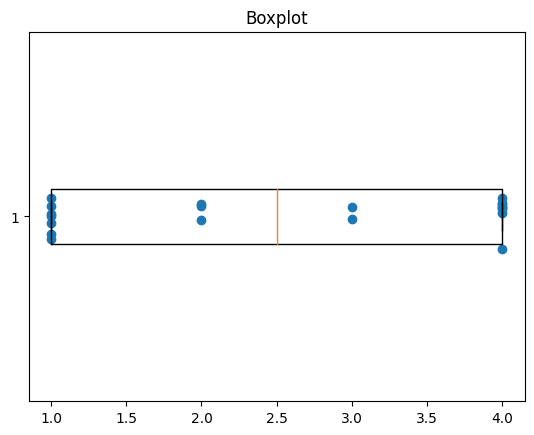

In [9]:
# Boxplot
plt.boxplot(X, vert = False)
y = np.random.normal(1, 0.04, len(X))
plt.scatter(X, y)
plt.title("Boxplot")

Teraz prichádza časť cvičenia, kde si máte nacvičiť prácu s dátami vy. Dole budete mať z časti pripravenú kostru pre dané cvičenia.

**Príklad 2.**

In [11]:
data = pd.read_csv(r"ocel.csv")
data.head()

,mez.d,mez.h,pocet
0,30,50,8
1,50,70,4
2,70,90,13
3,90,110,15
4,110,130,9


Kedže dostávame dáta vytriedené do intervalov, tak musíme urobiť ešte extra predspracovanie.

In [12]:
data["delka intervalu"] = data["mez.h"] - data["mez.d"]
data["stred intervalu"] = data["mez.d"] + data["delka intervalu"]/2
n = sum(data["pocet"]) # pocet pozorovani
data["relativni cetnosti"] = data["pocet"] / n
data["kumulativni cetnosti"] = data["pocet"].cumsum()
data["ECDF"] = data["kumulativni cetnosti"] / n # relativne kumulativne cetnosti
data["cetnostni hustota"] = data["relativni cetnosti"] / data["delka intervalu"]

Zvyšok úpravy dát už bude rovnaký a teda vám ho odporúčam spraviť samostatne.

In [13]:
# kedže máme tabuľku kde máme četnosti dát, tak si vytvoríme vektor dát nad ktorým sa bude krajšie pracovať
X = list(itertools.chain.from_iterable([list(itertools.repeat(to_repeat, times)) for (to_repeat, times) in zip(data['stred intervalu'], data['pocet'])]))
ic(X) # vpodstate sme si nakopirovali cetnost(times) krát znamky (to repeat) 
priemer =  np.mean(X) #priemer 
rozptyl = np.var(X)
vyberovy_rozptyl = rozptyl * n / (n-1)
smerodatna_odch = np.std(X)
median = np.quantile(X, 0.5, method = 'inverted_cdf')
q_025 = np.quantile(X, 0.25, method = 'inverted_cdf')
q_075 = np.quantile(X, 0.75, method = 'inverted_cdf')
IQR = q_075 - q_025 # kvartilova odchylka
# nakoniec hradby boxplotu
dvnh = q_025 - 1.5 * IQR # dolni vnitrni hradba
hvnh = q_075 + 1.5 * IQR# horni vnitrni hradba
dvoh = q_025 - 3 * IQR# dolni vonkajsi hradba
hvoh = q_075 + 3 * IQR# horni vonkajsi hradba
ic(n, priemer, rozptyl, vyberovy_rozptyl, smerodatna_odch, median, q_025, q_075, IQR, dvnh, hvnh, dvoh, hvoh)
data # tabulka cetnosti

ic| X: [40.0,
        40.0,
        40.0,
        40.0,
        40.0,
        40.0,
        40.0,
        40.0,
        60.0,
        60.0,
        60.0,
        60.0,
        80.0,
        80.0,
        80.0,
        80.0,
        80.0,
        80.0,
        80.0,
        80.0,
        80.0,
        80.0,
        80.0,
        80.0,
        80.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        100.0,
        120.0,
        120.0,
        120.0,
        120.0,
        120.0,
        120.0,
        120.0,
        120.0,
        120.0,
        140.0,
        140.0,
        140.0,
        140.0,
        140.0,
        140.0,
        140.0,
        160.0,
        160.0,
        160.0,
        160.0]
ic| n: 60
    priemer: 96.66666666666667
    rozptyl: 1148.888888888889
    vyberovy_rozptyl: 1168.361581920904
    smerodatn

,mez.d,mez.h,pocet,delka intervalu,stred intervalu,relativni cetnosti,kumulativni cetnosti,ECDF,cetnostni hustota
0,30,50,8,20,40.0,0.133333,8,0.133333,0.006667
1,50,70,4,20,60.0,0.066667,12,0.200000,0.003333
2,70,90,13,20,80.0,0.216667,25,0.416667,0.010833
3,90,110,15,20,100.0,0.250000,40,0.666667,0.012500
4,110,130,9,20,120.0,0.150000,49,0.816667,0.007500
5,130,150,7,20,140.0,0.116667,56,0.933333,0.005833
6,150,170,4,20,160.0,0.066667,60,1.000000,0.003333


Nasledujú grafy, aby aby bolo na nich krajšie vidno, že dané dáta hovorili o nejakom intervale, tak odporúčam pridať ešte stĺpček s popisom intervalu.

Text(0.5, 1.0, 'Stlpcovy graf')

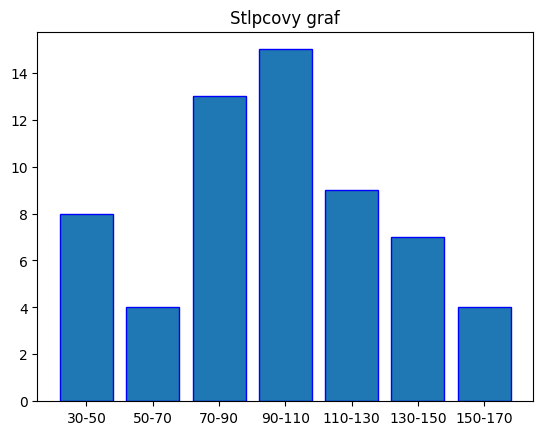

In [14]:
data["popis"] = data["mez.d"].astype(str) + "-" + data["mez.h"].astype(str)
# Stlpcovy graf
plt.bar(data["popis"], data["pocet"], label='Stlpcový graf', ec = "blue")
plt.title("Stlpcovy graf")


Text(0.5, 1.0, 'Cetnostni graf')

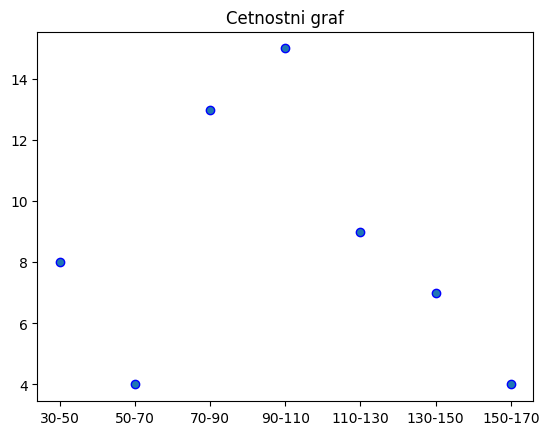

In [15]:
# Cetnostni graf
plt.scatter(data["popis"], data["pocet"], label='Cetnostni graf', ec = "blue")
plt.title("Cetnostni graf")

Text(0.5, 1.0, 'Polygon cetnosti')

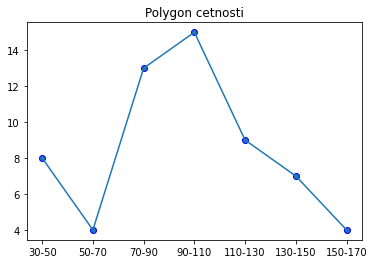

In [ ]:
# Polygon cetnosti
plt.scatter(data["popis"], data["pocet"], label='Polygon cetnosti', ec = "blue")
plt.plot(data["popis"], data["pocet"], label='Polygon cetnosti')
plt.title("Polygon cetnosti")

Text(0.5, 1.0, 'ECDF')

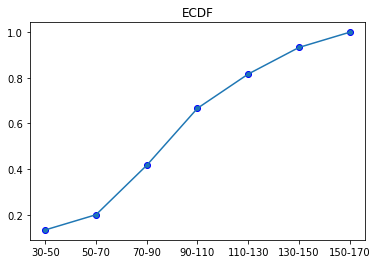

In [ ]:
# Empiricka distribucni funkce
plt.scatter(data["popis"], data["ECDF"], label='ECDF', ec = "blue")
plt.plot(data["popis"], data["ECDF"], label='ECDF')
plt.title("ECDF")

Text(0.5, 1.0, 'Histogram')

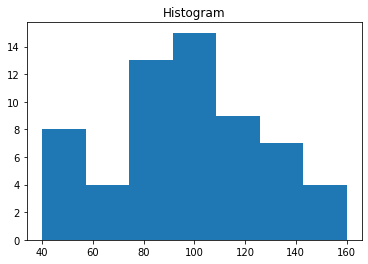

In [ ]:
# Histogram
# Pri praci s histogramom sa vraciame k nasemu vygenerovanemu vektoru X
plt.hist(X, label='Histogram', bins = 7)
plt.title("Histogram")

Text(0.5, 1.0, 'Boxplot')

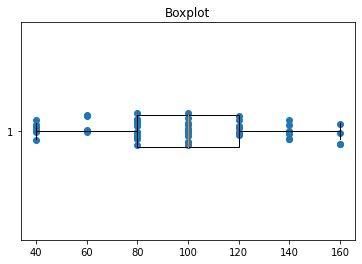

In [ ]:
# Boxplot
plt.boxplot(X, vert = False)
y = np.random.normal(1, 0.04, len(X))
plt.scatter(X, y)
plt.title("Boxplot")

**Príklad 3.**
V tomto príklade nebudeme spracovať dáta ale budeme upravovať špatne napočítané dáta.



V datovém souboru, z nehož byl vypočten průměr 110 a rozptyl 800, byly zjištěny
2 chyby: místo 85 má být 95 a místo 120 má být 150. Ostatních 18 údajú je
správných. Opravte prúměr a rozptyl.  Hint: pekne si rozpíšte definíciu rozpylu a priemeru a malo by vám to pekne vísť.

**Solution**

In [16]:
priemer = 110
rozptyl = 800
n = 20 # 18 je dobre a 2 spatne, teda dokopy 20

opraveny_priemer = priemer - (85 + 120) / n + (95 + 150) / n # 85 a 12 prec, 95 a 150 su opravene
ic(opraveny_priemer)

# použijeme, že rozptyl = (1/n * sum (x_i)^2) - priemer^2
# teda upravíme dva sčítance zo sumy a zmeníme priemer
opraveny_rozptyl = rozptyl - (85**2 + 120**2) / n + priemer**2 + (95**2 + 150**2) / n - opraveny_priemer**2
ic(opraveny_rozptyl)

ic| opraveny_priemer: 112.0
ic| opraveny_rozptyl: 851.0


851.0

**Príklad 4.** Znova dátová analýza, tu je však ďaľší pridaný krok. Kde si máme dáta vytriediť do intervalov. Uvažujem úlohu kde pracujete s premennou cnt, ostatné sú analogické.

In [20]:
tabulka = pd.read_csv(r"kola.csv")
tabulka.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
# roztriedme si policko cnt do intervalov
rows = len(tabulka) # pocet riadkov tabulky
number_of_bins = round(sqrt(rows)) # podla prednasky
ic(number_of_bins)
counts, intervals = np.histogram(tabulka["cnt"], bins=number_of_bins, range=None, density=None, weights=None)
ic(len(counts), len(intervals), counts, intervals) # ukážka, čo vlastne funkcia histogram vracia
# Nakoniec tieto dáta spojíme do nevého dataframu, s ktorým budeme pracovať
data = pd.DataFrame(list(zip(intervals[:-1], intervals[1:], counts)),columns =['start', 'end', 'counts'])
data.head()

ic| number_of_bins: 27
ic| len(counts): 27
    len(intervals): 28
    counts: array([ 1,  6, 11, 17, 30, 28, 26, 27, 21, 24, 33, 41, 52, 46, 63, 44, 36,
                   31, 24, 29, 23, 31, 30, 36, 10,  8,  3])
    intervals: array([  22.        ,  343.92592593,  665.85185185,  987.77777778,
                      1309.7037037 , 1631.62962963, 1953.55555556, 2275.48148148,
                      2597.40740741, 2919.33333333, 3241.25925926, 3563.18518519,
                      3885.11111111, 4207.03703704, 4528.96296296, 4850.88888889,
                      5172.81481481, 5494.74074074, 5816.66666667, 6138.59259259,
                      6460.51851852, 6782.44444444, 7104.37037037, 7426.2962963 ,
                      7748.22222222, 8070.14814815, 8392.07407407, 8714.        ])


,start,end,counts
0,22.000000,343.925926,1
1,343.925926,665.851852,6
2,665.851852,987.777778,11
3,987.777778,1309.703704,17
4,1309.703704,1631.629630,30


Ďalej je už všetko vpodstate rovnaké, teda je to na vás. 

In [8]:
data["delka intervalu"] = data["end"] - data["start"]
data["stred intervalu"] = data["start"] + data["delka intervalu"]/2
n = sum(data["counts"]) # pocet pozorovani
data["relativni cetnosti"] = data["counts"] / n
data["kumulativni cetnosti"] = data["counts"].cumsum()
data["ECDF"] = data["kumulativni cetnosti"] / n # relativne kumulativne cetnosti
data["cetnostni hustota"] = data["relativni cetnosti"] / data["delka intervalu"]
# X máme priamo zadané, teda he nebudeme počítať
X = tabulka["cnt"]
priemer =  np.mean(X) #priemer 
rozptyl = np.var(X)
vyberovy_rozptyl = rozptyl * n / (n-1)
smerodatna_odch = np.std(X)
median = np.quantile(X, 0.5, method = 'inverted_cdf')
q_025 = np.quantile(X, 0.25, method = 'inverted_cdf')
q_075 = np.quantile(X, 0.75, method = 'inverted_cdf')
IQR = q_075 - q_025 # kvartilova odchylka
# nakoniec hradby boxplotu
dvnh = q_025 - 1.5 * IQR # dolni vnitrni hradba
hvnh = q_075 + 1.5 * IQR# horni vnitrni hradba
dvoh = q_025 - 3 * IQR# dolni vonkajsi hradba
hvoh = q_075 + 3 * IQR# horni vonkajsi hradba
ic(n, priemer, rozptyl, vyberovy_rozptyl, smerodatna_odch, median, q_025, q_075, IQR, dvnh, hvnh, dvoh, hvoh)
data.head() # tabulka cetnosti

ic| n: 731
    priemer: 4504.3488372093025
    rozptyl: 3747654.4350841474
    vyberovy_rozptyl: 3752788.2082828926
    smerodatna_odch: 1935.8859561152221
    median: 4548
    q_025: 3141
    q_075: 5976
    IQR: 2835
    dvnh: -1111.5
    hvnh: 10228.5
    dvoh: -5364
    hvoh: 14481


,start,end,counts,delka intervalu,stred intervalu,relativni cetnosti,kumulativni cetnosti,ECDF,cetnostni hustota
0,22.000000,343.925926,1,321.925926,182.962963,0.001368,1,0.001368,0.000004
1,343.925926,665.851852,6,321.925926,504.888889,0.008208,7,0.009576,0.000025
2,665.851852,987.777778,11,321.925926,826.814815,0.015048,18,0.024624,0.000047
3,987.777778,1309.703704,17,321.925926,1148.740741,0.023256,35,0.047880,0.000072
4,1309.703704,1631.629630,30,321.925926,1470.666667,0.041040,65,0.088919,0.000127


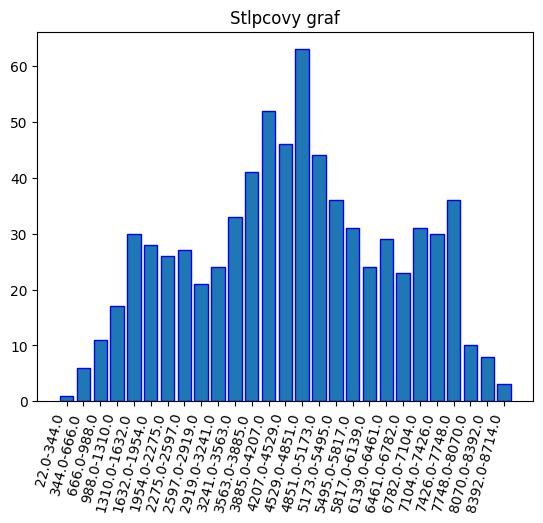

In [9]:
data["popis"] = round(data["start"]).astype(str) + "-" + round(data["end"]).astype(str)
# Stlpcovy graf
plt.bar(data["popis"], data["counts"], label='Stlpcový graf', ec = "blue")
plt.title("sloupkový diagram četností")
plt.xticks(rotation=75, ha='right')
None # nech zamedzim useless print

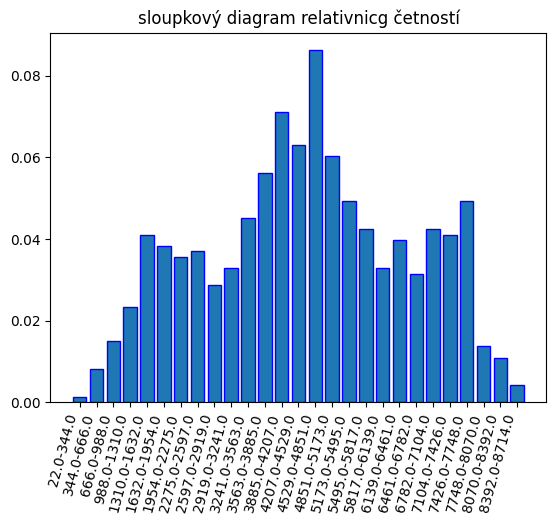

In [11]:
# Stlpcovy graf
plt.bar(data["popis"], data["relativni cetnosti"], label='Stlpcový graf', ec = "blue")
plt.title("sloupkový diagram relativnicg četností")
plt.xticks(rotation=75, ha='right')
None # nech zamedzim useless print

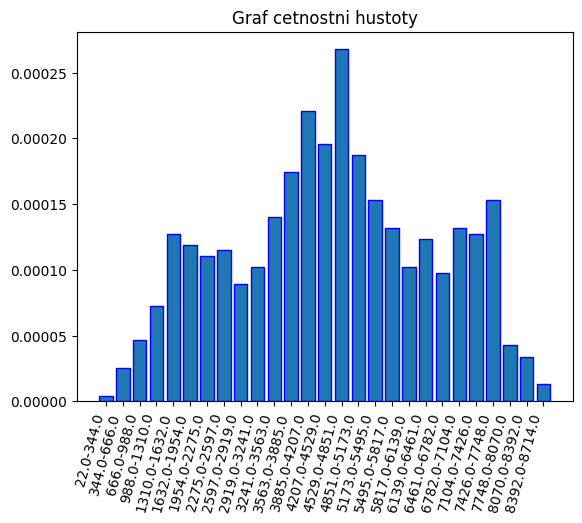

In [12]:
# Stlpcovy graf
plt.bar(data["popis"], data["cetnostni hustota"], label='Stlpcový graf', ec = "blue")
plt.title("Graf cetnostni hustoty")
plt.xticks(rotation=75, ha='right')
None # nech zamedzim useless print

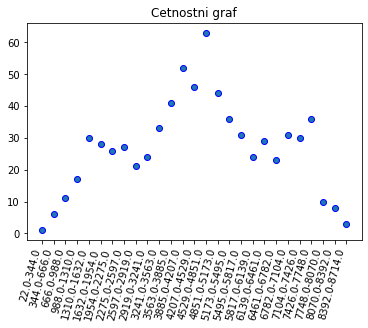

In [ ]:
# Cetnostni graf
plt.scatter(data["popis"], data["counts"], label='Cetnostni graf', ec = "blue")
plt.title("Cetnostni graf")
plt.xticks(rotation=75, ha='right')
None

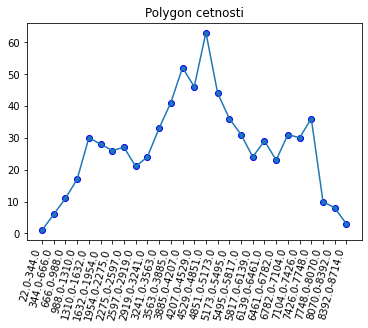

In [ ]:
# Polygon cetnosti
plt.scatter(data["popis"], data["counts"], label='Polygon cetnosti', ec = "blue")
plt.plot(data["popis"], data["counts"], label='Polygon cetnosti')
plt.title("Polygon cetnosti")
plt.xticks(rotation=75, ha='right')
None

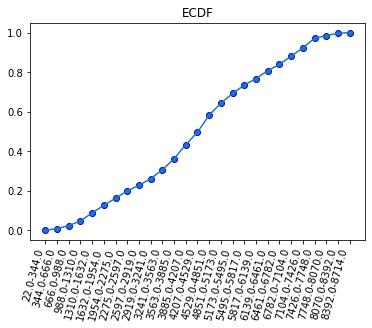

In [ ]:
# Empiricka distribucni funkce
plt.scatter(data["popis"], data["ECDF"], label='ECDF', ec = "blue")
plt.plot(data["popis"], data["ECDF"], label='ECDF')
plt.title("ECDF")
plt.xticks(rotation=75, ha='right')
None

Text(0.5, 1.0, 'Histogram')

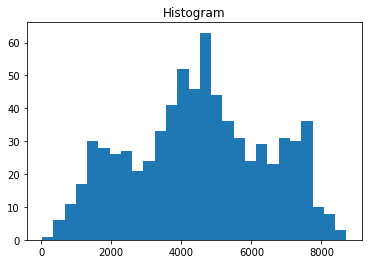

In [ ]:
# Histogram
# Pri praci s histogramom sa vraciame k nasemu vygenerovanemu vektoru X
plt.hist(X, label='Histogram', bins = number_of_bins)
plt.title("Histogram")

Text(0.5, 1.0, 'Boxplot')

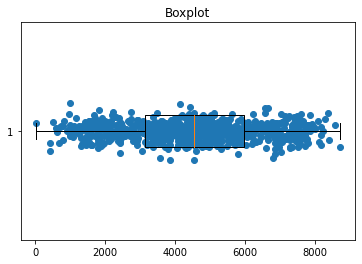

In [ ]:
# Boxplot
plt.boxplot(X, vert = False)
y = np.random.normal(1, 0.04, len(X))
plt.scatter(X, y)
plt.title("Boxplot")

Pozornejší z vás si určite všimli, že nakoniec si máte ešte skúsiť vykresliť aj zložitejšie grafy, toto sa dá urobiť napríklad pomocou knižnice **statsmodels.api**, ako príklad ukážem Q-Q plot pre štandardizované hodnoty. Toto je však skorej bonusová časť, ktorú od vás na odpovedníku a ani na skúške nebudeme očakávať.

Text(0.5, 1.0, 'Q-Q plot')

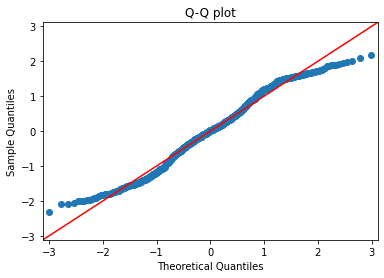

In [ ]:
import statsmodels.api as sm

# Najprv štandardizujeme dáta
m = np.mean(tabulka["cnt"])
st = np.std(tabulka["cnt"])

tabulka["standardized"] = (tabulka["cnt"]-m)/st
sm.qqplot(tabulka["standardized"], line ='45')
plt.title("Q-Q plot")
